# Pre-processing (state / organization Name) Regulatory data for WaDE upload.
- Purpose:  To preprocess the data into one master file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/Colorado/Regulatory" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/Colorado/Regulatory


## Regulatory Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/Groundwater_Management_Districts/Groundwater_Management_Districts.shp"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "re" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/shapefiles/Groundwater_Management_Districts.zip', compression=dict(method='zip', archive_name='Groundwater_Management_Districts.csv'), index=False)

# Realign Geometry Projection
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326)

print(len(dfin1))
dfin1.head()

13


,OBJECTID,PERIMETER,MD_NAME,MDID,BMNDS_NO,FORMATION_,AMENDED_DA,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,1,224641.11567,Central Yuma,5,1-5,1967-05-22,,224643.29565,2010438013.08000,"POLYGON ((-102.05166 40.17715, -102.05167 40.1...",re0
1,2,146771.52468,Marks Butte,11,1-11,1977-08-05,,146770.14014,750708676.46500,"POLYGON ((-102.65135 40.77851, -102.65125 40.7...",re1
2,3,241327.98905,Frenchman,4,1-4,1967-05-22,1977-04-21,241329.21017,2623488158.69000,"POLYGON ((-102.65135 40.77851, -102.65150 40.7...",re2
3,4,238791.96085,W-Y,6,1-6,1967-05-22,,238794.41003,2377972505.63000,"POLYGON ((-102.45472 40.43920, -102.45451 40.4...",re3
4,5,142787.31594,Sand Hills,2,1-2,1966-12-09,,142788.70838,1095359481.88000,"POLYGON ((-102.05208 40.43986, -102.05147 40.4...",re4


In [4]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "8/4/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "COre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["MD_NAME"]
df['in_ReportingUnitNativeID'] = "co" + dfin1["OBJECTID"].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Ground Water Management District"
df['in_ReportingUnitUpdateDate'] = "9/1/1996"
df['in_StateCV'] = "CO"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Division of Water Resources"
df['in_RegulatoryDescription'] = "Administers water rights, issues water well permits, represents Colorado in interstate water compact proceedings, monitors streamflow and water use, approves construction and repair of dams and performs dam safety inspections, issues licenses for well drillers and assures the safe and proper construction of water wells, and maintains numerous databases of Colorado water information."
df['in_RegulatoryName'] = dfin1["MD_NAME"]
df['in_RegulatoryOverlayNativeID'] = "co" + dfin1["OBJECTID"].astype(str)
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = "https://dwr.colorado.gov/services/well-permitting/designated-basins"
df['in_StatutoryEffectiveDate'] = dfin1["FORMATION_"]
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Ground Water Management District"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

13


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,8/4/2023,2023,COre_O1,4326,Central Yuma,co1,,Ground Water Management District,9/1/1996,CO,,Division of Water Resources,"Administers water rights, issues water well pe...",Central Yuma,co1,Active,,https://dwr.colorado.gov/services/well-permitt...,1967-05-22,,Ground Water Management District,Groundwater
1,re1,8/4/2023,2023,COre_O1,4326,Marks Butte,co2,,Ground Water Management District,9/1/1996,CO,,Division of Water Resources,"Administers water rights, issues water well pe...",Marks Butte,co2,Active,,https://dwr.colorado.gov/services/well-permitt...,1977-08-05,,Ground Water Management District,Groundwater
2,re2,8/4/2023,2023,COre_O1,4326,Frenchman,co3,,Ground Water Management District,9/1/1996,CO,,Division of Water Resources,"Administers water rights, issues water well pe...",Frenchman,co3,Active,,https://dwr.colorado.gov/services/well-permitt...,1967-05-22,,Ground Water Management District,Groundwater
3,re3,8/4/2023,2023,COre_O1,4326,W-Y,co4,,Ground Water Management District,9/1/1996,CO,,Division of Water Resources,"Administers water rights, issues water well pe...",W-Y,co4,Active,,https://dwr.colorado.gov/services/well-permitt...,1967-05-22,,Ground Water Management District,Groundwater
4,re4,8/4/2023,2023,COre_O1,4326,Sand Hills,co5,,Ground Water Management District,9/1/1996,CO,,Division of Water Resources,"Administers water rights, issues water well pe...",Sand Hills,co5,Active,,https://dwr.colorado.gov/services/well-permitt...,1966-12-09,,Ground Water Management District,Groundwater


## Regulatory Area #2

In [5]:
# etc etc,

## Concatenate DataFrames together

In [6]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

13


## Clean Data / data types

In [7]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [8]:
outdf['in_ReportingUnitName'] = df.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Central Yuma', 'Marks Butte', 'Frenchman', 'W-Y', 'Sand Hills',
       'Plains', 'East Cheyenne', 'Southern High Plains',
       'Upper Black Squirrel Creek', 'North Kiowa Bijou', 'Lost Creek',
       'Arikaree', 'Big Sandy'], dtype=object)

In [9]:
outdf['in_RegulatoryDescription'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Administers water rights, issues water well permits, represents Colorado in interstate water compact proceedings, monitors streamflow and water use, approves construction and repair of dams and performs dam safety inspections, issues licenses for well drillers and assures the safe and proper construction of water wells, and maintains numerous databases of Colorado water information.'],
      dtype=object)

In [10]:
outdf['in_RegulatoryName'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Central Yuma', 'Marks Butte', 'Frenchman', 'W-Y', 'Sand Hills',
       'Plains', 'East Cheyenne', 'Southern High Plains',
       'Upper Black Squirrel Creek', 'North Kiowa Bijou', 'Lost Creek',
       'Arikaree', 'Big Sandy'], dtype=object)

In [11]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

array(['1967-05-22T00:00:00.000000000', '1977-08-05T00:00:00.000000000',
       '1966-12-09T00:00:00.000000000', '1967-01-27T00:00:00.000000000',
       '1973-05-24T00:00:00.000000000', '1974-08-16T00:00:00.000000000',
       '1979-12-04T00:00:00.000000000', '1967-03-27T00:00:00.000000000',
       '1974-02-08T00:00:00.000000000', '1967-12-13T00:00:00.000000000',
       '1976-10-22T00:00:00.000000000'], dtype='datetime64[ns]')

# Shapefile Data
- For attaching geometry to reporting unit info.

#### Regulatory Area #1 shapefile info

In [12]:
# Input File
shapeInputFile = "RawInputData/shapefiles/Groundwater_Management_Districts/Groundwater_Management_Districts.shp"
gdfin1 = gpd.read_file(shapeInputFile)

# Realign Geometry Projection
gdfin1['geometry'] = gdfin1['geometry'].to_crs(epsg=4326)

print(len(gdfin1))
gdfin1.head()

13


,OBJECTID,PERIMETER,MD_NAME,MDID,BMNDS_NO,FORMATION_,AMENDED_DA,Shape_Leng,Shape_Area,geometry
0,1,224641.11567,Central Yuma,5,1-5,1967-05-22,None,224643.29565,2010438013.08000,"POLYGON ((-102.05166 40.17715, -102.05167 40.1..."
1,2,146771.52468,Marks Butte,11,1-11,1977-08-05,None,146770.14014,750708676.46500,"POLYGON ((-102.65135 40.77851, -102.65125 40.7..."
2,3,241327.98905,Frenchman,4,1-4,1967-05-22,1977-04-21,241329.21017,2623488158.69000,"POLYGON ((-102.65135 40.77851, -102.65150 40.7..."
3,4,238791.96085,W-Y,6,1-6,1967-05-22,None,238794.41003,2377972505.63000,"POLYGON ((-102.45472 40.43920, -102.45451 40.4..."
4,5,142787.31594,Sand Hills,2,1-2,1966-12-09,None,142788.70838,1095359481.88000,"POLYGON ((-102.05208 40.43986, -102.05147 40.4..."


<AxesSubplot: >

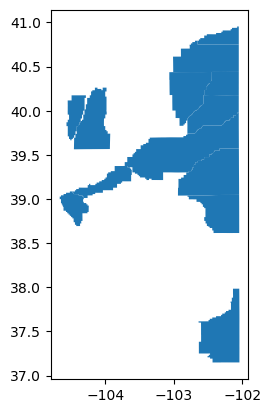

In [13]:
# plot shape info to map
gdfin1.plot()

In [14]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] = "co" + gdfin1["OBJECTID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

13


,in_ReportingUnitNativeID,geometry
0,co1,"POLYGON ((-102.05166 40.17715, -102.05167 40.1..."
1,co2,"POLYGON ((-102.65135 40.77851, -102.65125 40.7..."
2,co3,"POLYGON ((-102.65135 40.77851, -102.65150 40.7..."
3,co4,"POLYGON ((-102.45472 40.43920, -102.45451 40.4..."
4,co5,"POLYGON ((-102.05208 40.43986, -102.05147 40.4..."


#### Regulatory Area #2 shapefile info

In [15]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [16]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

13


,in_ReportingUnitNativeID,geometry
0,co1,"POLYGON ((-102.05166 40.17715, -102.05167 40.1..."
1,co2,"POLYGON ((-102.65135 40.77851, -102.65125 40.7..."
2,co3,"POLYGON ((-102.65135 40.77851, -102.65150 40.7..."
3,co4,"POLYGON ((-102.45472 40.43920, -102.45451 40.4..."
4,co5,"POLYGON ((-102.05208 40.43986, -102.05147 40.4..."


## Export Data

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [19]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pre_coMain.zip', compression=dict(method='zip', archive_name='Pre_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.